# Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Docs
import acquire
import prepare

# 1. Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

## Store Data

In [2]:
#Acquiring store item dataset
store_df = acquire.combined_dataframes()

In [3]:
#Looking at first 3 values
store_df.sample(3)

,Unnamed: 0_x,item,sale_amount,sale_date,sale_id,store,Unnamed: 0_y,store_address,store_city,store_id,store_state,store_zipcode,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
709013,709013,39,35.0,"Tue, 10 Jun 2014 00:00:00 GMT",709014,9,8,735 SW Military Dr,San Antonio,9,TX,78221,38,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254
295931,295931,17,27.0,"Tue, 30 Apr 2013 00:00:00 GMT",295932,3,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,16,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791
451760,451760,25,66.0,"Fri, 09 Jan 2015 00:00:00 GMT",451761,8,7,15000 San Pedro Ave,San Antonio,8,TX,78232,24,Hood,25,Hood Latte Iced Coffee Drink Vanilla Latte,2.43,44100117428,44100117428


In [4]:
#Looking at datatypes
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0_x   913000 non-null  int64  
 1   item           913000 non-null  int64  
 2   sale_amount    913000 non-null  float64
 3   sale_date      913000 non-null  object 
 4   sale_id        913000 non-null  int64  
 5   store          913000 non-null  int64  
 6   Unnamed: 0_y   913000 non-null  int64  
 7   store_address  913000 non-null  object 
 8   store_city     913000 non-null  object 
 9   store_id       913000 non-null  int64  
 10  store_state    913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  Unnamed: 0     913000 non-null  int64  
 13  item_brand     913000 non-null  object 
 14  item_id        913000 non-null  int64  
 15  item_name      913000 non-null  object 
 16  item_price     913000 non-null  float64
 17  item_upc12     913000 non-nul

In [5]:
#drop columns
store_df= prepare.drop_cols(store_df)

In [6]:
#Changing sale date datatype to datatime64 object
prepare.datatype_datatime64(store_df)

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,2017-12-27 00:00:00+00:00,912996,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,50,59.0,2017-12-28 00:00:00+00:00,912997,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,50,74.0,2017-12-29 00:00:00+00:00,912998,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,50,62.0,2017-12-30 00:00:00+00:00,912999,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


In [7]:
#Verifying columns were dropped
store_df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [8]:
#Verifying sale date datatype was changed to datatime datatype
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   item           913000 non-null  int64              
 1   sale_amount    913000 non-null  float64            
 2   sale_date      913000 non-null  datetime64[ns, UTC]
 3   sale_id        913000 non-null  int64              
 4   store          913000 non-null  int64              
 5   store_address  913000 non-null  object             
 6   store_city     913000 non-null  object             
 7   store_id       913000 non-null  int64              
 8   store_state    913000 non-null  object             
 9   store_zipcode  913000 non-null  int64              
 10  item_brand     913000 non-null  object             
 11  item_id        913000 non-null  int64              
 12  item_name      913000 non-null  object             
 13  item_price     913000 non-nul

In [14]:
# Set the index to be the datetime variable.
store_df= prepare.set_store_index(store_df)

In [15]:
# Verify sale date was indexed
store_df.sample(5)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2015-11-11 00:00:00+00:00,38,73.0,685795,6,1015 S WW White Rd,San Antonio,6,TX,78220,Sundown Naturals,38,Sundown Naturals Essential Electrolytes Tropic...,3.45,30768540548,30768540548
2016-07-09 00:00:00+00:00,33,100.0,591084,4,516 S Flores St,San Antonio,4,TX,78204,The First Years,33,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078
2013-03-25 00:00:00+00:00,29,37.0,511364,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Heinz,29,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038
2016-09-05 00:00:00+00:00,1,23.0,4996,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2017-01-31 00:00:00+00:00,49,24.0,881624,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Easy-off,49,Easy-off Oven Cleaner Lemon Scent,9.54,62338879772,62338879772


<AxesSubplot:xlabel='sale_date'>

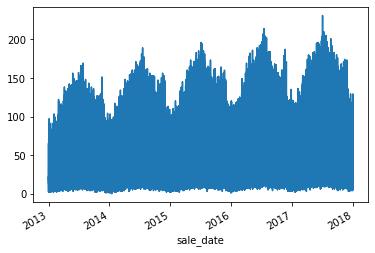

In [21]:
# Line plot with date on the x-axis
store_df['sale_amount'].plot()

<AxesSubplot:xlabel='sale_date'>

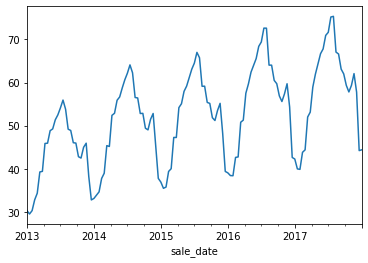

In [18]:
# Re-sampling at a longer frequency "smooths" the line
store_df['sale_amount'].resample('2W').mean().plot()

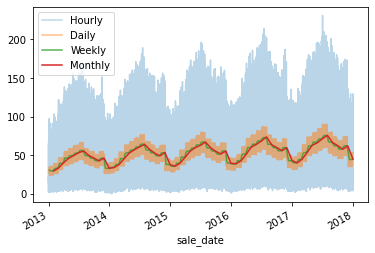

In [20]:
# We can combine multiple resampling periods on a single viz
ax = store_df['sale_amount'].plot(alpha=.3, label='Hourly')
store_df['sale_amount'].resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
store_df['sale_amount'].resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
store_df['sale_amount'].resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()

<AxesSubplot:ylabel='sale_date'>

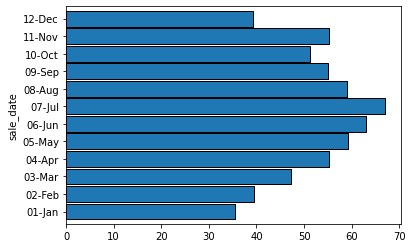

In [22]:
store_df['sale_amount'].groupby(store_df['sale_amount'].index.strftime('%m-%b')).mean().plot.barh(width=.9, ec='black')

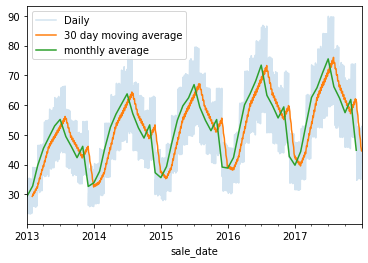

In [23]:
#Plotting moving averages
ax = store_df['sale_amount'].resample('D').mean().plot(label='Daily', alpha=.2)
store_df['sale_amount'].resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
store_df['sale_amount'].resample('M').mean().plot(ax=ax, label='monthly average')
ax.legend()

<AxesSubplot:xlabel='sale_date'>

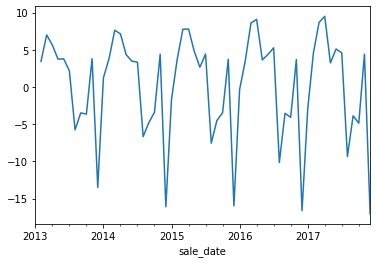

In [45]:
#Visualize monthly sale_amounts by sale_date
store_df['sale_amount'].resample('M').mean().diff().plot()

## opsd dataset

In [25]:
#Acquire germany dataframe
germany_df= acquire.get_germany_data("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv", cached=False)

In [26]:
#Looking at what is in the dataframe
germany_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


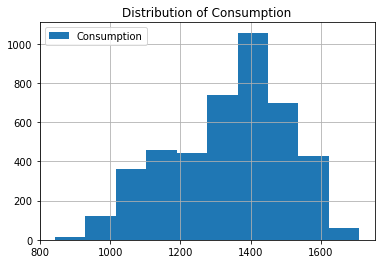

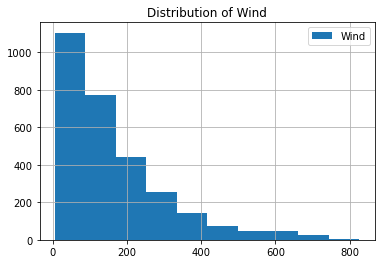

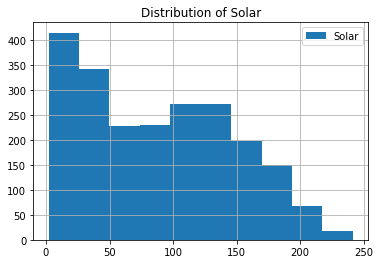

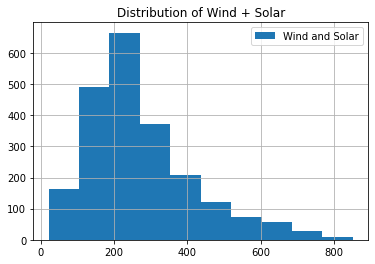

In [29]:
#Prepare germany data using function from prepare.py file
germany_df= prepare.prepare_germany_data(germany_df)

In [30]:
germany_df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [31]:
#Looking at datatypes in germany dataset
germany_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


<AxesSubplot:xlabel='Date'>

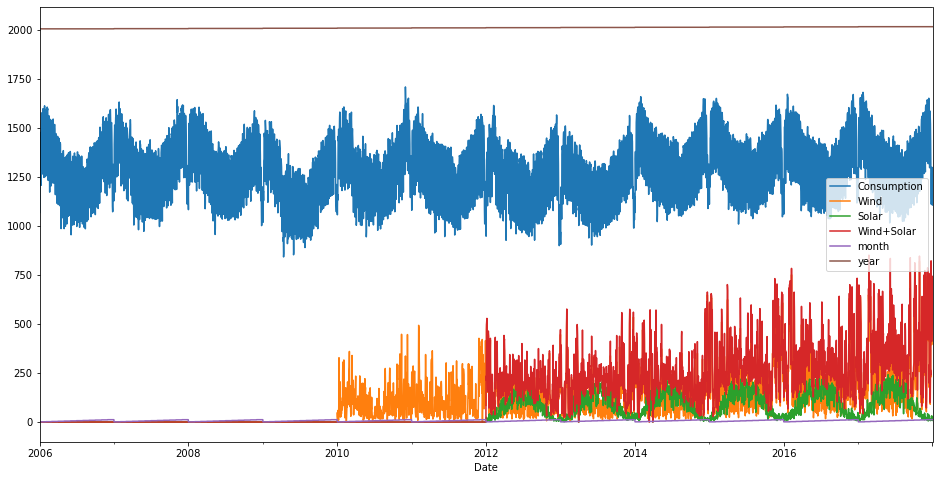

In [34]:
# Line plot with date on the x-axis
germany_df.plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

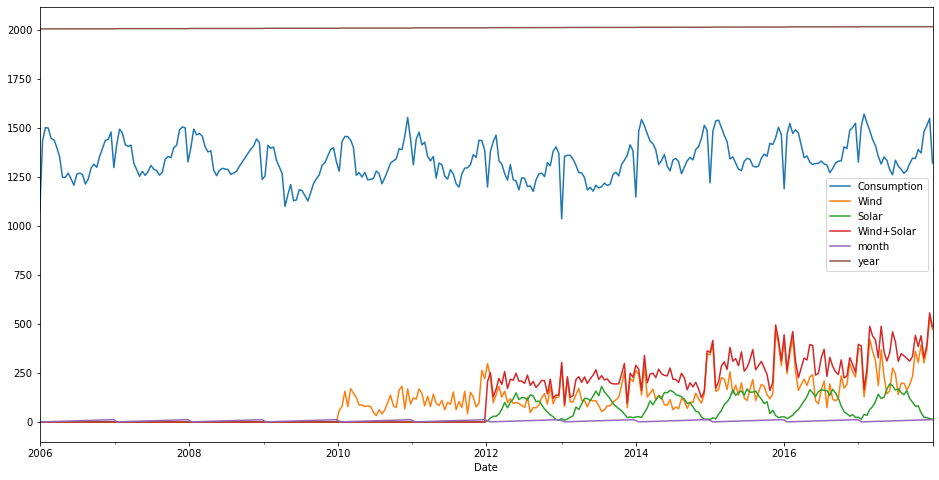

In [36]:
# Re-sampling at a longer frequency "smooths" the line
germany_df.resample('2W').mean().plot(figsize=(16,8))

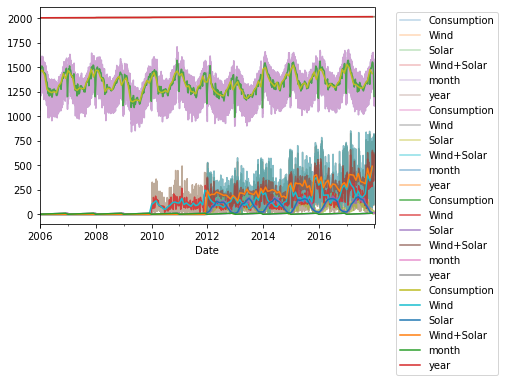

In [41]:
# We can combine multiple resampling periods on a single viz
ax = germany_df.plot(alpha=.3, label='Hourly')
germany_df.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
germany_df.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
germany_df.resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

<AxesSubplot:ylabel='Date'>

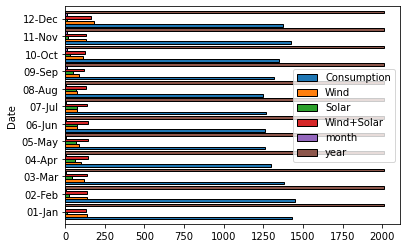

In [42]:
germany_df.groupby(germany_df.index.strftime('%m-%b')).mean().plot.barh(width=.9, ec='black')

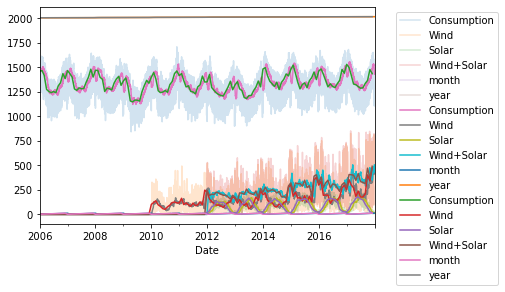

In [44]:
#Plotting moving averages
ax = germany_df.resample('D').mean().plot(label='Daily', alpha=.2)
germany_df.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
germany_df.resample('M').mean().plot(ax=ax, label='monthly average')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

<AxesSubplot:xlabel='Date'>

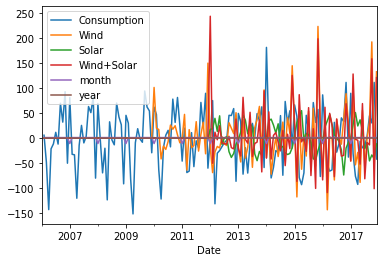

In [46]:
#Visualize monthly changes
germany_df.resample('M').mean().diff().plot()

# 2. For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

## Store Data

In [50]:
# splitting data (store data)
store_train_size = .70
store_n = store_df.shape[0]
store_test_start_index = round(store_train_size * store_n)

store_train = store_df[:test_start_index] # everything up (not including) to the test_start_index
store_test = store_df[test_start_index:] # everything from the test_start_index to the end

In [72]:
#Looking at columns in store train
store_train.columns.tolist()

['item',
 'sale_amount',
 'sale_id',
 'store',
 'store_address',
 'store_city',
 'store_id',
 'store_state',
 'store_zipcode',
 'item_brand',
 'item_id',
 'item_name',
 'item_price',
 'item_upc12',
 'item_upc14']

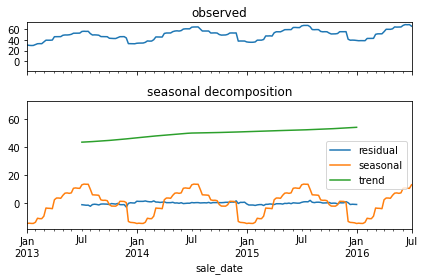

In [53]:
import statsmodels.api as sm

s = store_train['sale_amount'].resample('W').mean()


result = sm.tsa.seasonal_decompose(s, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

- Note: A seasonal plot is one that shows the comparison of multiple years together

In [69]:
#creating y variable to use in plots below
y=store_train['sale_amount']

Text(0.5, 1.0, 'Lag plot with lag=1')

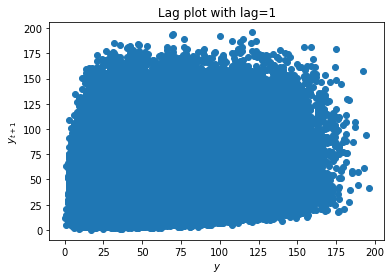

In [70]:
#Creating lag plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

- Note: A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

## Germany Data

In [54]:
# splitting data (germany data)
germany_train_size = .70
germany_n = germany_df.shape[0]
germany_test_start_index = round(germany_train_size * germany_n)

germany_train = germany_df[:test_start_index] # everything up (not including) to the test_start_index
germany_test = germany_df[test_start_index:] # everything from the test_start_index to the end

In [57]:
#Looking at what columns are in germany train dataset
germany_train.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'month', 'year'], dtype='object')

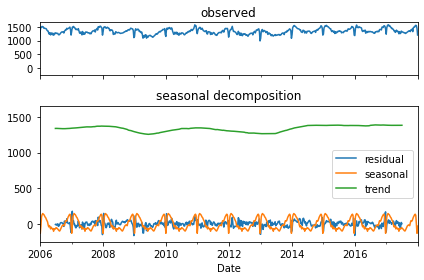

In [60]:
#Seasonal plot of germany consumption column
import statsmodels.api as sm

gc = germany_train['Consumption'].resample('W').mean()


result = sm.tsa.seasonal_decompose(gc, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

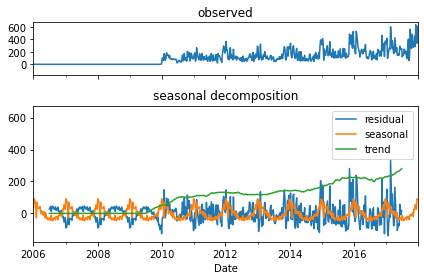

In [63]:
#Seasonal plot of germany wind column
import statsmodels.api as sm

gw = germany_train['Wind'].resample('W').mean()


result = sm.tsa.seasonal_decompose(gw, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

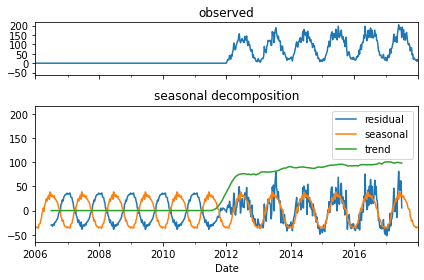

In [68]:
#Seasonal plot of germany solar column
import statsmodels.api as sm

gs = germany_train['Solar'].resample('W').mean()


result = sm.tsa.seasonal_decompose(gs, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

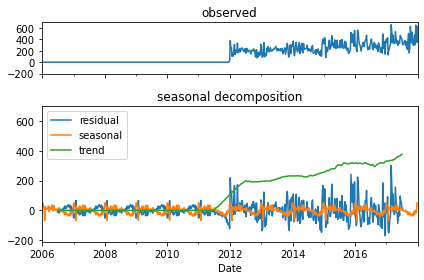

In [67]:
#Seasonal plot of germany wind+solar column
import statsmodels.api as sm

gws = germany_train['Wind+Solar'].resample('W').mean()


result = sm.tsa.seasonal_decompose(gws, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

- Note: A seasonal plot is one that shows the comparison of multiple years together

In [73]:
#creating y variable to use in plots below
y2=germany_train['Consumption']

Text(0.5, 1.0, 'Lag plot with lag=1')

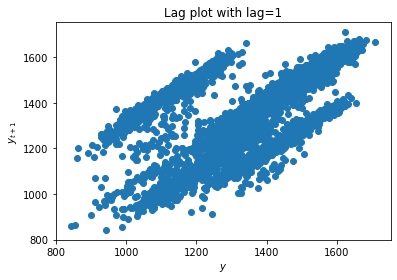

In [74]:
#Creating lag plot
plt.scatter(y2, y2.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [75]:
#creating y variable to use in plots below
y3=germany_train['Wind']

Text(0.5, 1.0, 'Lag plot with lag=1')

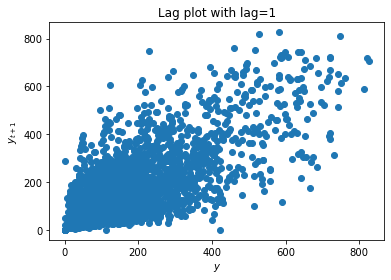

In [76]:
#Creating lag plot
plt.scatter(y3, y3.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [77]:
#creating y variable to use in plots below
y4=germany_train['Solar']

Text(0.5, 1.0, 'Lag plot with lag=1')

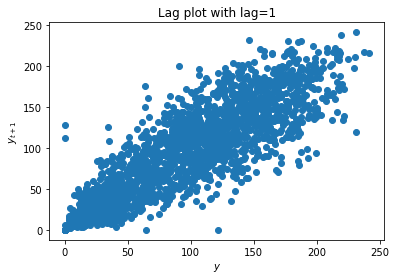

In [78]:
#Creating lag plot
plt.scatter(y4, y4.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [79]:
#creating y variable to use in plots below
y5=germany_train['Wind+Solar']

Text(0.5, 1.0, 'Lag plot with lag=1')

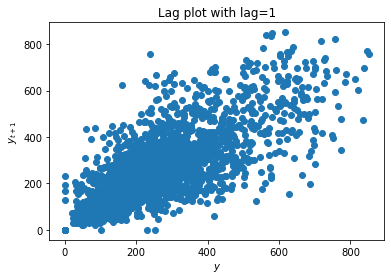

In [80]:
#Creating lag plot
plt.scatter(y5, y5.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

- Note: A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

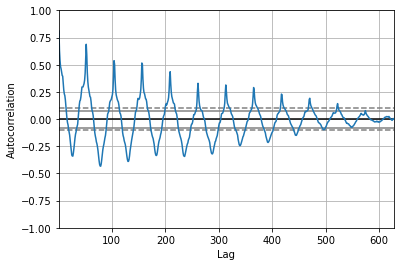

In [81]:
#Autocorrelation: Consumption
pd.plotting.autocorrelation_plot(germany_train.Consumption.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

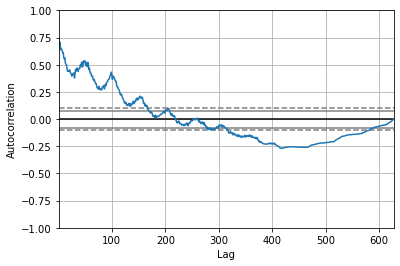

In [82]:
#Autocorrelation: Wind
pd.plotting.autocorrelation_plot(germany_train.Wind.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

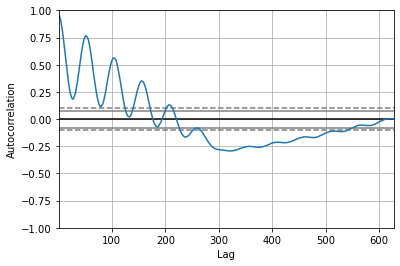

In [83]:
#Autocorrelation: Solar
pd.plotting.autocorrelation_plot(germany_train.Solar.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

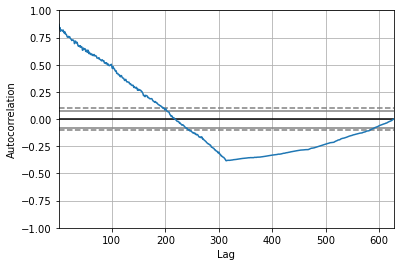

In [84]:
#Autocorrelation: Wind+Solar
pd.plotting.autocorrelation_plot(germany_train['Wind+Solar'].resample('W').mean())

- Note: Autocorrelation is a measure of the linear relationship between lagged values of a time series.